**Stock Market Data Analysis:**

This project involves analyzing stock market data using Python, specifically leveraging the Pandas library for data manipulation and Matplotlib for data visualization. The goal is to provide insights into stock performance by calculating key metrics such as daily returns and moving averages, and by visualizing trends and patterns in the data. The project includes the implementation of Bollinger Bands to further enhance technical analysis of stock price movements.


In [17]:
# Uplode the file
from google.colab import files
uploaded = files.upload()

Saving National_Stock_Exchange_of_India_Ltd.csv to National_Stock_Exchange_of_India_Ltd (1).csv


In [7]:
# Import both packages
import pandas as pd
import matplotlib.pyplot as plt
# Load the stock market data from CSV file
data = pd.read_csv('National_Stock_Exchange_of_India_Ltd.csv')

In [8]:
# Display the first few rows of the dataset
print(data.head())

       Symbol       Open       High        Low        LTP    Chng  % Chng  \
0  ADANIPORTS        750        766     713.25        715  -47.45   -6.22   
1  ASIANPAINT   3,101.00   3,167.35   3,091.00   3,138.00   -6.25   -0.20   
2    AXISBANK        669      674.9     660.45        661  -18.90   -2.78   
3  BAJAJ-AUTO   3,370.00   3,383.50   3,320.00   3,335.00  -56.70   -1.67   
4  BAJAJFINSV  17,200.00  17,237.20  16,610.00  16,684.00 -684.85   -3.94   

   Volume (lacs) Turnover (crs.)      52w H     52w L  365 d % chng  \
0          72.20          532.63        901     384.4         79.22   
1          10.29          322.53   3,505.00  2,117.15         45.66   
2         102.53             684      866.9     568.4         10.19   
3           3.42          114.59   4,361.40  3,041.00          9.30   
4           3.42          576.79  19,325.00  8,273.70         91.38   

   30 d % chng  
0        -4.65  
1         5.66  
2       -21.49  
3       -12.05  
4        -9.10  


In [9]:
# Get basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     object 
 2   High             50 non-null     object 
 3   Low              50 non-null     object 
 4   LTP              50 non-null     object 
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     object 
 9   52w H            50 non-null     object 
 10  52w L            50 non-null     object 
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float64(5), object(8)
memory usage: 5.2+ KB
None


In [10]:
# Calculate Daily Return using the 'LTP' column
data['LTP'] = data['LTP'].replace(',', '', regex=True).astype(float)
data['Daily Return'] = data['LTP'].pct_change()

# Print the updated DataFrame
print(data.head())
print(data[['Symbol', 'LTP', 'Daily Return']].head())

       Symbol       Open       High        Low      LTP    Chng  % Chng  \
0  ADANIPORTS        750        766     713.25    715.0  -47.45   -6.22   
1  ASIANPAINT   3,101.00   3,167.35   3,091.00   3138.0   -6.25   -0.20   
2    AXISBANK        669      674.9     660.45    661.0  -18.90   -2.78   
3  BAJAJ-AUTO   3,370.00   3,383.50   3,320.00   3335.0  -56.70   -1.67   
4  BAJAJFINSV  17,200.00  17,237.20  16,610.00  16684.0 -684.85   -3.94   

   Volume (lacs) Turnover (crs.)      52w H     52w L  365 d % chng  \
0          72.20          532.63        901     384.4         79.22   
1          10.29          322.53   3,505.00  2,117.15         45.66   
2         102.53             684      866.9     568.4         10.19   
3           3.42          114.59   4,361.40  3,041.00          9.30   
4           3.42          576.79  19,325.00  8,273.70         91.38   

   30 d % chng  Daily Return  
0        -4.65           NaN  
1         5.66      3.388811  
2       -21.49     -0.789356 

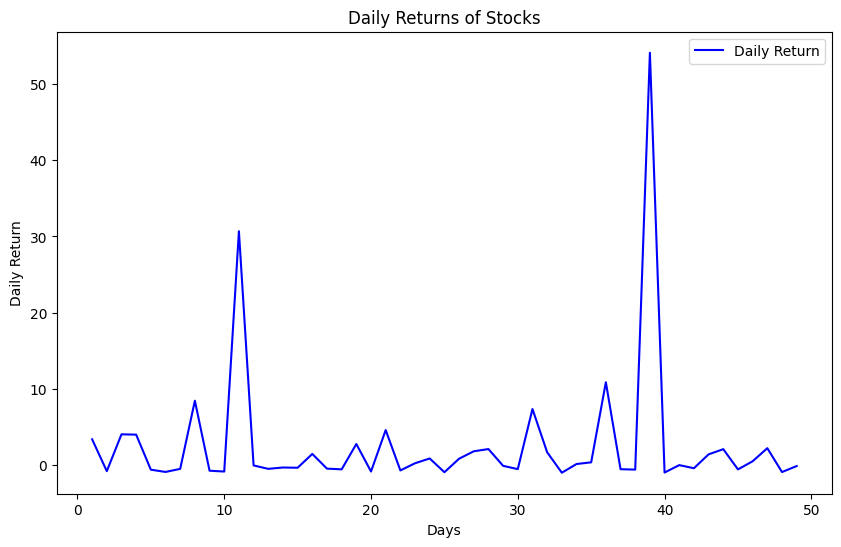

In [12]:
# Plotting the Daily Return
plt.figure(figsize=(10, 6))
plt.plot(data['Daily Return'], label='Daily Return', color='blue')
plt.title('Daily Returns of Stocks')
plt.xlabel('Days')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

In [14]:
# Calculate the moving average (50-day and 200-day) using the 'LTP' column
data['50 MA'] = data['LTP'].rolling(window=50).mean()
data['200 MA'] = data['LTP'].rolling(window=200).mean()

# Generate a range of dates assuming the dataset is daily
data['Date'] = pd.date_range(start='2023-01-01', periods=len(data), freq='B')  # 'B' for business days


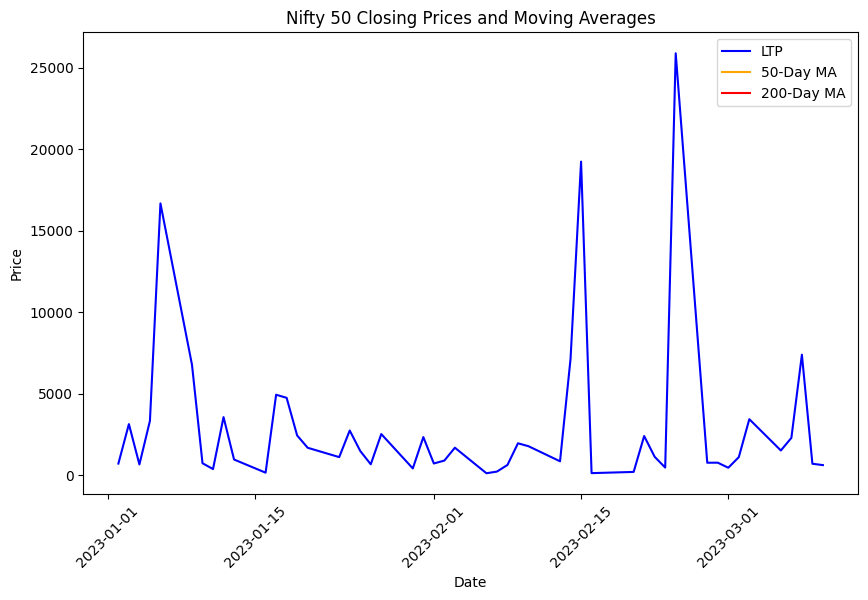

In [13]:
# Plot the moving averages along with the Last Traded Price
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['LTP'], label='LTP', color='blue')
plt.plot(data['Date'], data['50 MA'], label='50-Day MA', color='orange')
plt.plot(data['Date'], data['200 MA'], label='200-Day MA', color='red')
plt.title('Nifty 50 Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

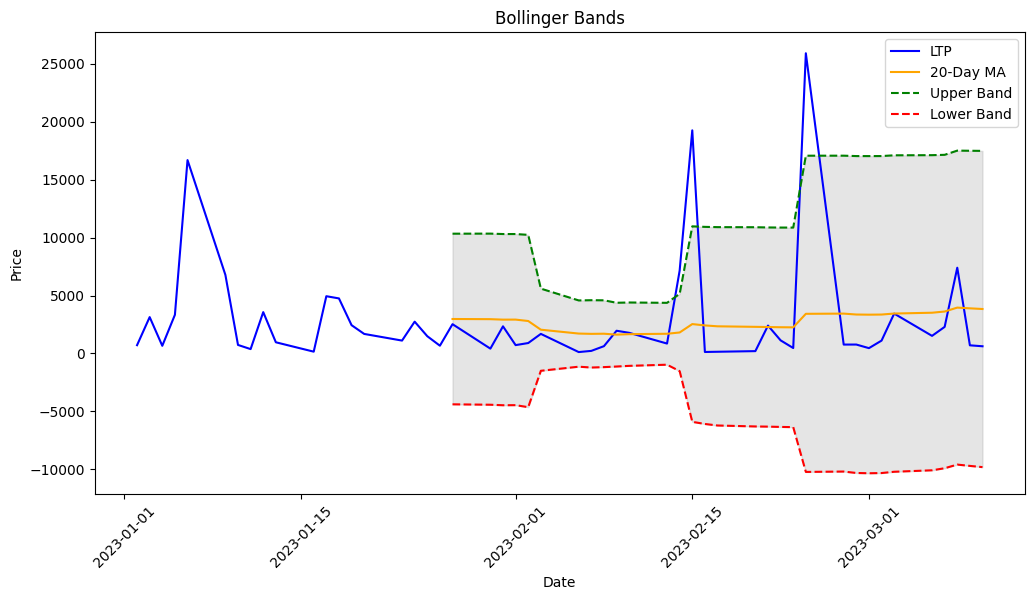

In [16]:
# Calculate Bollinger Bands
window = 20  # window size for moving average
data['Rolling Mean'] = data['LTP'].rolling(window=window).mean()  # Calculate rolling mean
data['Upper Band'] = data['Rolling Mean'] + (data['LTP'].rolling(window=window).std() * 2)  # Upper Band
data['Lower Band'] = data['Rolling Mean'] - (data['LTP'].rolling(window=window).std() * 2)  # Lower Band

# Plotting the LTP and Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['LTP'], label='LTP', color='blue')
plt.plot(data['Date'], data['Rolling Mean'], label='20-Day MA', color='orange')
plt.plot(data['Date'], data['Upper Band'], label='Upper Band', color='green', linestyle='--')
plt.plot(data['Date'], data['Lower Band'], label='Lower Band', color='red', linestyle='--')

# Fill the area between upper and lower bands
plt.fill_between(data['Date'], data['Upper Band'], data['Lower Band'], color='grey', alpha=0.2)

# Add titles and labels
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()